In [1]:
from __future__ import print_function
import os.path
from collections import defaultdict
import string
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'http://www.inmobiliaria24.com/nicaragua-es/category-178.1'
pages = str(list(range(1,165)))

In [3]:
# Use a defaultdict with an empty list because it eases the DataFrame creation
names = []
descripcion = []
location = []
size = []
price = []

In [4]:
for page in pages:
    
    # Make a get request
    response = get('http://www.inmobiliaria24.com/nicaragua-es/category-178.'+page)
    soup = BeautifulSoup(response.text,'html.parser')
    containers = soup.find_all('div', class_ = 'property-details-item listing')

    # Extract data from individual movie container
    for container in containers:
            # The name
            name = container.h3.a.text
            names.append(name)

            # desc
            desc1 = container.find_all('p', class_ = '')
            desc1 = desc1[0].text
            descripcion.append(desc1)
            
            #size
            size1 = container.find_all('p', class_ = '')
            size1 = size1[1].text
            size.append(size1)
            
            #loc
            loc1 = container.p.text
            location.append(loc1)
        
            #price
            price1 = container.find('span', class_ = 'price')
            if type(price1) == 'str':
                price1 = price1.text
                price.append(price1)
            else:
                price.append('Missing')

In [5]:
import pandas as pd

test_df = pd.DataFrame({'Nombre': names,
                       'Descripcion': descripcion,
                       'Lugar': location,
                        'Size': size,
                       'Precio': price})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 5 columns):
Descripcion    4296 non-null object
Lugar          4296 non-null object
Nombre         4296 non-null object
Precio         4296 non-null object
Size           4296 non-null object
dtypes: object(5)
memory usage: 167.9+ KB
None


,Descripcion,Lugar,Nombre,Precio,Size
0,Vendo hermoso terreno (10 x 30 mts) que cuenta...,Ciudad Managua,GANGA - Terreno/Apartamento en Reparto San Jua...,Missing,\n Publicado : 02/04/2018 2 Habitaciones\n 3...
1,"Propiedad en km 12.7 en carretera a Masaya, fr...",Managua,Terreno en carretera a Masaya,Missing,\n Publicado : 23/03/2018 4425 m2\n
2,vendo lotes de terrenos desde 799 varas cuadra...,Jinotepe,"VENDO LOTES DE TERRENOS JINOTEPE, CARAZO",Missing,\n Publicado : 06/04/2018 1000 m2\n
3,VENDO TERRERO ZONA CENTRICA \n\nEspecificacion...,La Paz Centro,VENDO TERRENO EN LA PAZ CENTRO,Missing,\n Publicado : 29/03/2018 10.5 m2\n
4,29 manzanas. Finca con vistas al mar. 500 mts ...,Tola,"Finca Las Salinas, La Virgen",Missing,\n Publicado : 15/03/2018 7000 m2\n
5,Precioso terreno esquinero al principio de la ...,Santo Domingo,Precioso lote en Estancia Santo Domingo,Missing,\n Publicado : 13/03/2018 1658 m2\n
6,"9,000 varas aproximadas \nVistas panorámicas e...",Managua,Bellísimo lote en venta Km 18 carretera Masaya,Missing,\n Publicado : 10/03/2018 7540 m2\n
7,Vendo Terreno de 16 varas de frente con 50 var...,Estelí,Terreno la Riviera Esteli,Missing,\n Publicado : 08/03/2018 800 m2\n
8,"Terreno de 3,626 vrs2, ideal para negocios : ...",Nandaime,"Vendo Terreno para Inversión : Restaurante, otros",Missing,\n Publicado : 26/03/2018 3031 m2\n
9,Terrenos en ubicación privilegiada con Todos l...,Estelí,Urbanizización La Fe II Etapa en Esteli,Missing,\n Publicado : 25/03/2018 168 m2\n


In [25]:
quick = test_df.pivot_table(test_df,index='Lugar',aggfunc='count')
quick = quick.reset_index()
quick.dtypes

Lugar          object
Descripcion     int64
Nombre          int64
Precio          int64
Size            int64
dtype: object

In [22]:
import seaborn as sns

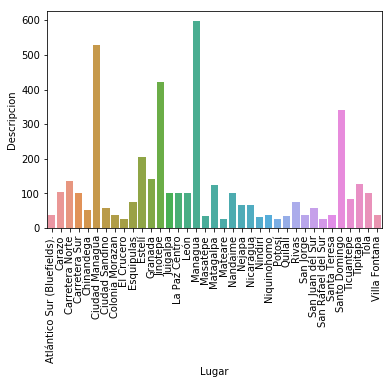

In [34]:
sns.barplot(x='Lugar', y='Descripcion',data=quick)
plt.xticks(rotation=90)
plt.show()